# Imports

In [20]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from mlxtend.plotting import plot_decision_regions

# Fake datasets

In [2]:
X, y = make_moons(n_samples=1000, noise=0.15, random_state=42)

# Visualizing the datasets

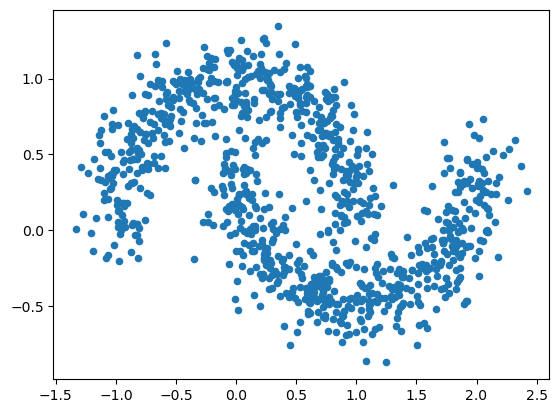

In [16]:
plt.scatter(X[:, 0], X[:, 1], s = 20)

# Fitting the SVM model

In [22]:
svm_clf = make_pipeline(
        StandardScaler(), 
        PolynomialFeatures(degree=3),
        LinearSVC(C= 10, max_iter=10_000, random_state=42)
)

In [23]:
svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearsvc',
                 LinearSVC(C=10, max_iter=10000, random_state=42))])

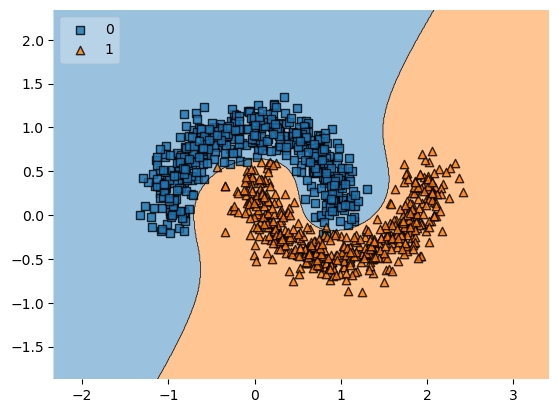

In [24]:
plot_decision_regions(clf=svm_clf, X = X, y=y, legend=2)
plt.show()

# Lets see how the model with three different degrees of freedom: 2, 3, 4

In [27]:
classifiers = [(make_pipeline(StandardScaler()), PolynomialFeatures(degree=degree), LinearSVC(C = 10, max_iter=10_000, random_state=42)) for degree in [2, 3, 4]]

AttributeError: 'tuple' object has no attribute 'fit'

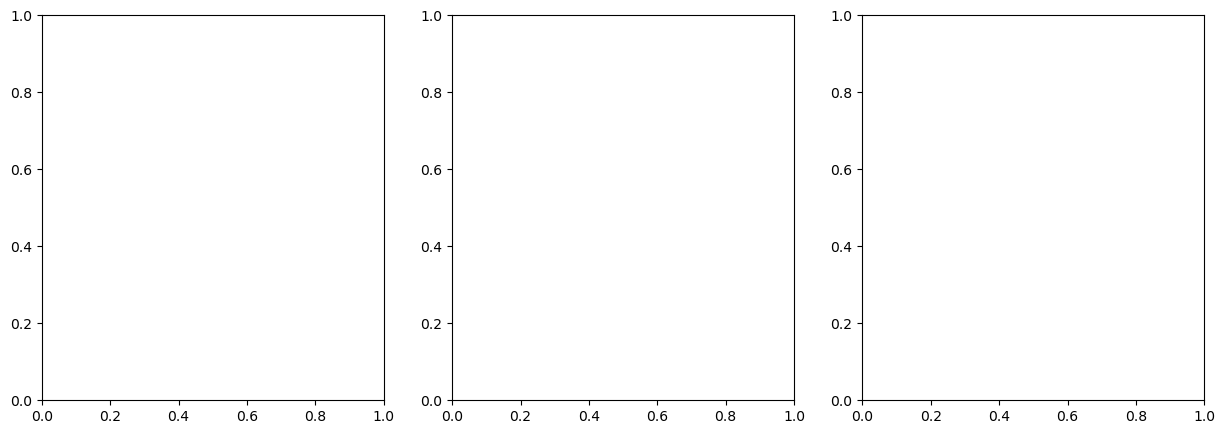

In [30]:
fig, ax = plt.subplots(1, 3, figsize = (15, 5 ))
for classifier, ax, degree in zip(classifiers, ax, [2, 3, 4]):
    classifier.fit(X, y)
    plot_decision_regions(clf=classifier, X=X, y=y)
    ax.set_title(f'Degree: {degree}')
plt.show()

tuple